## Extreme Weather Analysis

Heatwaves consistently lead to increased death and illness, and many communities and regions have developed heat action plans (HAPs). The Numerical Weather Prediction (NWP) model has been widely used for forecasting air temperature, but generally it has a systematic bias due to its coarse grid resolution and lack of parametrizations. Reliable forecasting of air temperature at 2 m above the land surface plays a significant role when preparing for potential weather-related disasters, such as heat waves.

Dataset Description:

Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

lat - Latitude (Â°): 37.456 to 37.645

lon - Longitude (Â°): 126.826 to 127.135

DEM - Elevation (m): 12.4 to 212.3

Slope - Slope (Â°): 0.1 to 5.2

Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

Objectives of the Study
1.	To develop machine learning‐based bias correction models—RF, SVR, ANN, and a multi‐model ensemble (MME)—to improve NWP model‐derived daily maximum air temperature.
2.	To examine the spatiotemporal characteristics of the corrected temperature in comparison with the NWP model output.


In [1]:
#loading the required libraries
import pandas as pd
import numpy as np


In [2]:
#loading the train data
df = pd.read_csv('train_dataset.csv')
df.head()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,30.3,21.1,61.741207,87.262192,26.629430,23.075077,4.263528,21.399026,0.297776,0.616711,...,0.000000,0.000000,0.000479,0.000000,37.5776,126.938,75.0924,1.7678,5131.667480,26.4
1,29.3,20.9,85.943954,97.694801,25.380395,23.275475,8.697955,53.165713,0.901123,0.867350,...,2.642577,0.261794,0.288428,2.315489,37.5507,126.988,132.1180,0.5931,5918.901367,25.6
2,29.5,22.2,32.008099,69.966370,31.991670,21.475995,10.461500,37.582673,0.012838,0.086090,...,0.000000,0.000000,0.000000,0.000000,37.5507,126.937,30.0464,0.8552,5222.419434,30.6
3,32.6,21.2,60.070614,91.244827,27.043616,23.338373,15.686361,95.842065,0.622580,0.388476,...,0.285723,0.335796,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5558.630371,27.2
4,33.0,27.6,62.508846,86.983963,31.529577,27.307177,6.493082,49.887497,0.438076,0.458994,...,0.000000,0.000000,0.000000,0.000000,37.5102,127.042,54.6384,0.1457,5635.460449,32.8


## Data Exploration

In [3]:
#descriptive statistics
df.describe()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
count,6528.000000,6528.000000,6524.000000,6524.000000,6524.000000,6524.000000,6524.000000,6524.000000,6524.000000,6524.000000,...,6524.000000,6524.000000,6524.000000,6524.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6567.000000
mean,29.767203,23.217862,56.733485,88.375947,29.618749,23.514294,7.078863,62.607915,0.368274,0.356035,...,0.578082,0.479413,0.280178,0.273615,37.544970,126.991331,62.042712,1.254981,5342.443957,30.284102
std,2.983094,2.429038,14.643501,7.201419,2.949113,2.345499,2.151549,33.846639,0.263172,0.258348,...,1.919926,1.745113,1.169598,1.230588,0.050402,0.079562,54.485681,1.368080,429.247389,3.132548
min,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000
25%,27.800000,21.600000,45.957097,84.224436,27.662062,22.100277,5.681878,37.253107,0.145684,0.138993,...,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,5004.824219,28.200000
50%,29.900000,23.400000,55.017689,89.798084,29.697722,23.763636,6.540526,56.871052,0.314975,0.313254,...,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5435.520020,30.500000
75%,32.000000,24.900000,67.205536,93.771591,31.729855,25.147837,7.990957,84.235666,0.574132,0.557710,...,0.049101,0.016580,0.007753,0.000000,37.577600,127.042000,59.832400,1.767800,5730.027832,32.700000
max,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,...,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000


In [4]:
#maximum temperature
max_present_temp =max(df['Present_Tmax'])
max_present_temp

37.6

In [5]:
#Minimum temperature
min_present_temp = min(df['Present_Tmin'])
min_present_temp

11.3

In [6]:
## Checking for missing values
df.isna().sum()

Present_Tmax        61
Present_Tmin        61
LDAPS_RHmin         65
LDAPS_RHmax         65
LDAPS_Tmax_lapse    65
LDAPS_Tmin_lapse    65
LDAPS_WS            65
LDAPS_LH            65
LDAPS_CC1           65
LDAPS_CC2           65
LDAPS_CC3           65
LDAPS_CC4           65
LDAPS_PPT1          65
LDAPS_PPT2          65
LDAPS_PPT3          65
LDAPS_PPT4          65
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           22
dtype: int64

- The dataset contains missing values

In [7]:
#Dropping the missing values
df.dropna(inplace=True)

#checking for missing values
df.isna().sum()

Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
dtype: int64

In [8]:
df.shape

(6450, 22)

## EXPLORATORY DATA ANALYSIS

### Univariate Analysis

- Looks into each variable.

array([[<Axes: title={'center': 'Present_Tmax'}>,
        <Axes: title={'center': 'Present_Tmin'}>,
        <Axes: title={'center': 'LDAPS_RHmin'}>,
        <Axes: title={'center': 'LDAPS_RHmax'}>],
       [<Axes: title={'center': 'LDAPS_Tmax_lapse'}>,
        <Axes: title={'center': 'LDAPS_Tmin_lapse'}>,
        <Axes: title={'center': 'LDAPS_WS'}>,
        <Axes: title={'center': 'LDAPS_LH'}>],
       [<Axes: title={'center': 'LDAPS_CC1'}>,
        <Axes: title={'center': 'LDAPS_CC2'}>,
        <Axes: title={'center': 'LDAPS_CC3'}>,
        <Axes: title={'center': 'LDAPS_CC4'}>],
       [<Axes: title={'center': 'LDAPS_PPT1'}>,
        <Axes: title={'center': 'LDAPS_PPT2'}>,
        <Axes: title={'center': 'LDAPS_PPT3'}>,
        <Axes: title={'center': 'LDAPS_PPT4'}>],
       [<Axes: title={'center': 'lat'}>, <Axes: title={'center': 'lon'}>,
        <Axes: title={'center': 'DEM'}>,
        <Axes: title={'center': 'Slope'}>],
       [<Axes: title={'center': 'Solar radiation'}>,
      

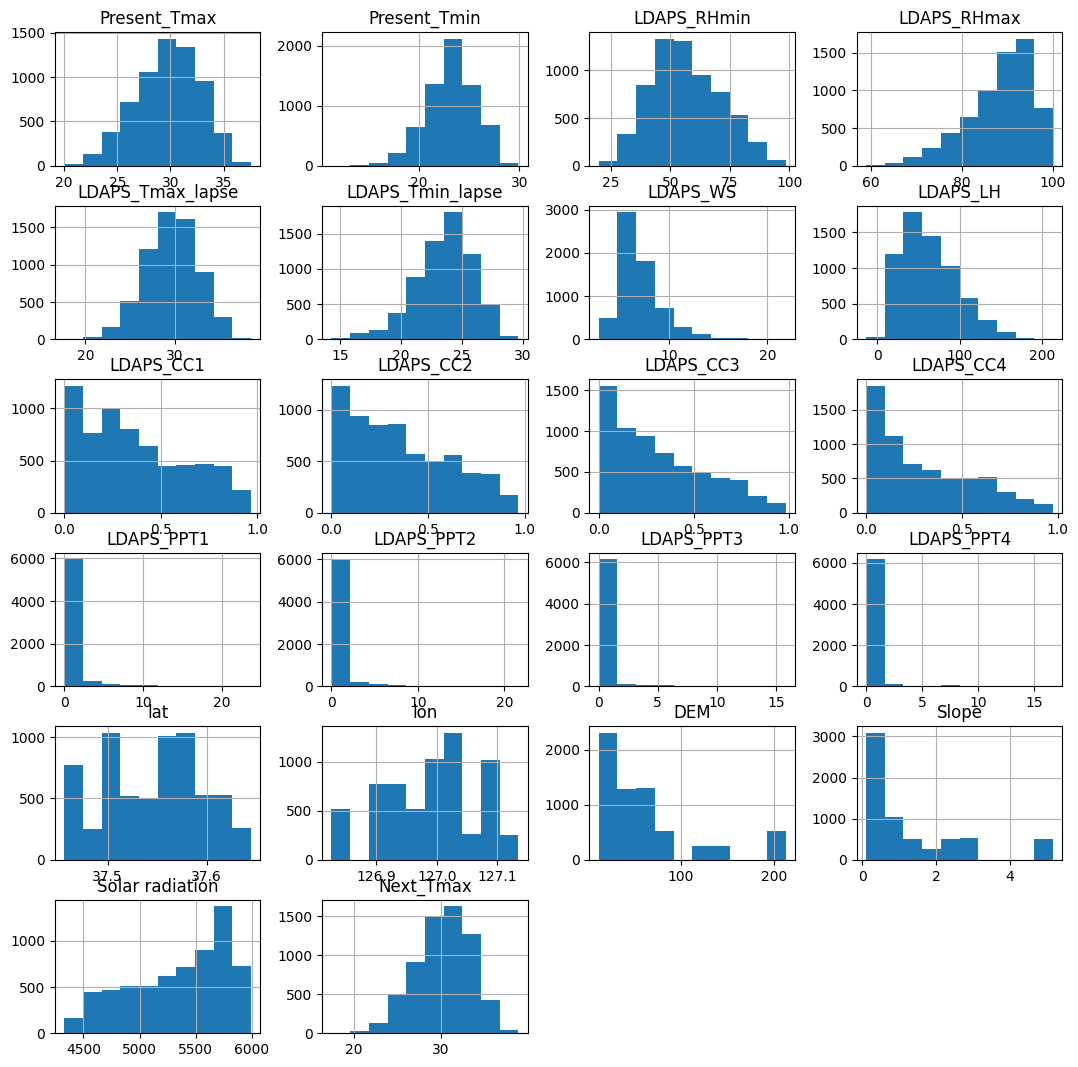

In [9]:
#Histogram of the variables
df.hist(layout = (6,4), sharex = False,figsize = (13,13))

In [10]:
df.nunique()

Present_Tmax         167
Present_Tmin         153
LDAPS_RHmin         6446
LDAPS_RHmax         6439
LDAPS_Tmax_lapse    6448
LDAPS_Tmin_lapse    6449
LDAPS_WS            6449
LDAPS_LH            6449
LDAPS_CC1           6359
LDAPS_CC2           6369
LDAPS_CC3           6382
LDAPS_CC4           6325
LDAPS_PPT1          2342
LDAPS_PPT2          2104
LDAPS_PPT3          1962
LDAPS_PPT4          1596
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1571
Next_Tmax            178
dtype: int64

In [11]:
df.dtypes

Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
dtype: object

# Feature Selection

- In many cases, a hybrid approach that combines NWP model data with bias correction using in-situ and auxiliary data can provide the most accurate forecasts, especially when dealing with a wide range of weather conditions and over larger geographic areas. However, if your bias correction model can achieve the desired accuracy without relying on NWP data, there may be valid reasons to drop it.

## Checking for redundant features using Correlation

Unsupervised Feature Selection: does NOT use target variable (removes redundant features e.g. correlation)

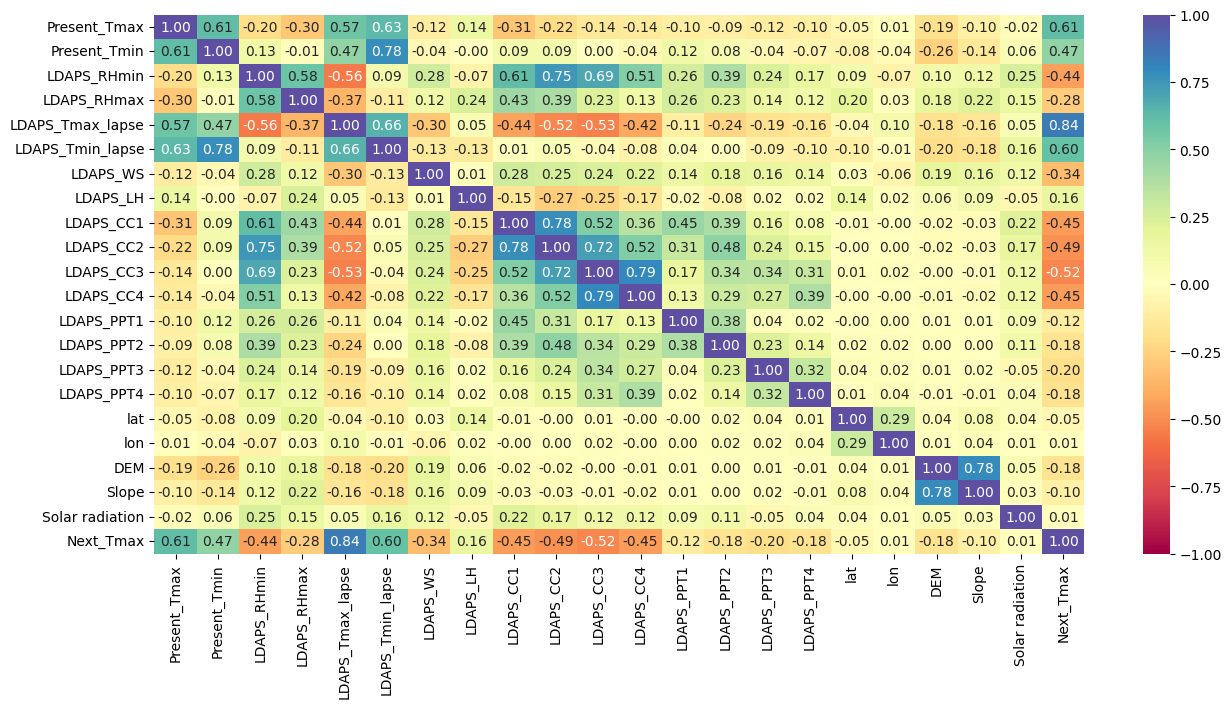

In [12]:
#loading the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Correlation matrix
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [13]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax'],
      dtype='object')

# Feature Transformation
- Process of modifying data but keeping the information.


In [14]:
X = df.drop('Next_Tmax', axis='columns')
y = df['Next_Tmax']

In [15]:
X.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation'],
      dtype='object')

In [16]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler

#Scaling the independent variables- Minimax scaler[variables will be defined in a scale of 0-1]
#defining the minmax scaler
scaler=MinMaxScaler()
#Applying the scaler to our numerical inputs in the training dataset
scaled_input=scaler.fit_transform(X)
scaled_inputs=pd.DataFrame(scaled_input,columns=['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation'])
scaled_inputs



,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation
0,0.585227,0.526882,0.532789,0.689801,0.430480,0.573572,0.072777,0.154183,0.307849,0.636866,...,0.670288,0.000000,0.000000,0.000030,0.000000,0.643008,0.362460,0.313667,0.328623,0.482240
1,0.528409,0.516129,0.840204,0.943859,0.370767,0.586630,0.306475,0.294114,0.931607,0.895696,...,0.918613,0.111494,0.012108,0.018207,0.139023,0.500530,0.524272,0.598845,0.097372,0.955515
2,0.539773,0.586022,0.155130,0.268608,0.686834,0.469375,0.399415,0.225471,0.013272,0.088904,...,0.518386,0.000000,0.000000,0.000000,0.000000,0.500530,0.359223,0.088397,0.148969,0.536799
3,0.715909,0.532258,0.511570,0.786788,0.450281,0.590728,0.674770,0.482101,0.643642,0.401172,...,0.000000,0.012055,0.015531,0.000000,0.000000,0.786017,0.666667,0.161990,0.081820,0.738925
4,0.738636,0.876344,0.542540,0.683026,0.664743,0.849338,0.190276,0.279674,0.452896,0.473994,...,0.321967,0.000000,0.000000,0.000000,0.000000,0.286017,0.699029,0.211379,0.009297,0.785114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6445,0.647727,0.784946,0.640871,0.771212,0.581035,0.732786,0.239345,0.214607,0.589060,0.798042,...,0.213565,0.001565,0.055517,0.000000,0.000000,0.643008,0.831715,0.237354,0.509478,0.589477
6446,0.727273,0.483871,0.284453,0.268323,0.527199,0.394680,0.529196,0.683695,0.120430,0.141717,...,0.017241,0.000000,0.000000,0.000000,0.000000,0.071504,0.546926,0.349667,0.425104,0.831359
6447,0.625000,0.720430,0.419350,0.664101,0.727277,0.745321,0.194870,0.488597,0.026206,0.103856,...,0.066137,0.000000,0.000000,0.000000,0.000000,0.071504,0.546926,0.349667,0.425104,0.548394
6448,0.397727,0.682796,0.681455,0.844449,0.459715,0.690862,0.127628,0.191828,0.596006,0.700373,...,0.332190,0.005021,0.026173,0.000000,0.000000,0.429025,0.838188,0.081664,0.103317,0.820482


# Splitting the data into train and test(80% - 20%)


In [17]:
# loading required libraries
from sklearn.model_selection import train_test_split
#splitting the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)



# Fitting the models

## Random Forest

-Is an ensemble of decision tree algorithms.


In [18]:
##loading required libraries
from sklearn.ensemble import RandomForestRegressor

# initializing the random forest classifier
RF= RandomForestRegressor(n_estimators = 30,random_state =1,bootstrap=False,criterion='squared_error')
RF.fit(X_train,y_train)


RandomForestRegressor(bootstrap=False, n_estimators=30, random_state=1)

In [19]:
# Using the fitted model on the test dataset
#Testing  the model
y_pred=RF.predict(X_test)
y_pred

array([29.1       , 32.78      , 31.20666667, ..., 26.42666667,
       26.47666667, 25.19666667])

In [20]:
#loading required library
from sklearn.metrics import mean_squared_error

#checking the MSE of the model
mse=mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 2.0462602583979335
Root Mean Squared Error (RMSE): 1.4304755357565306


- A smaller MSE is preferred because it indicates that your data points are dispersed closely around its central moment (mean)

In [21]:
df.columns

Index(['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax'],
      dtype='object')

In [22]:
# Importing the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

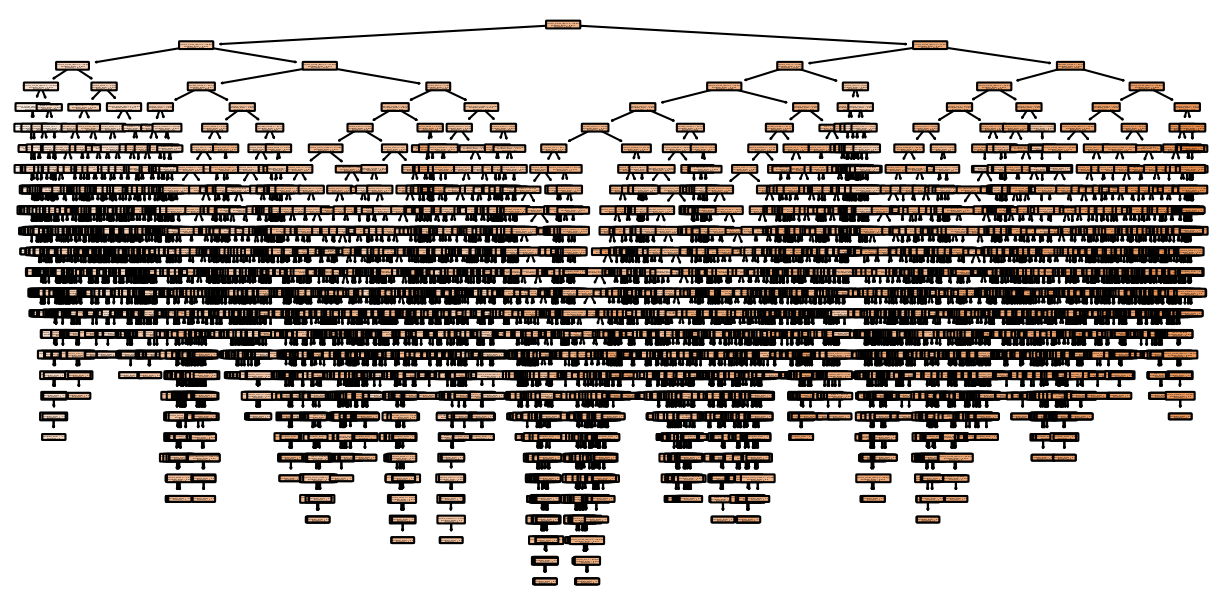

In [23]:
# Get the feature names from X_train
features = X_train.columns.tolist()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), dpi=150)
plot_tree(RF.estimators_[10], feature_names=features, filled=True, rounded=True)
plt.show()

## Gradient Boosting

- Is a powerful ensemble learning technique that is commonly used for both regression and classification problems. It belongs to the family of boosting algorithms, which combine the predictions of multiple weak learners (typically decision trees) to create a strong learner.  

In [24]:
# Loading required libraries
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
#Defining the gradient Boost parameters
gb_model = GradientBoostingRegressor(
    n_estimators=100,   # Number of boosting stages (trees)
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,        # Maximum depth of individual trees
    random_state=42     # Random seed for reproducibility
)

In [26]:
# Fitting the model to the train data
gb_model.fit(X_train,y_train)

#using the fitted model to make predictions
y_pred_gb = gb_model.predict(X_test)

gb_mse=mean_squared_error(y_test, y_pred_gb)
gb_rmse = mean_squared_error(y_test, y_pred_gb, squared=False)
print("Mean Squared Error (MSE):", gb_mse)
print("Root Mean Squared Error (RMSE):", gb_rmse)


Mean Squared Error (MSE): 1.429749995767002
Root Mean Squared Error (RMSE): 1.1957215377197996


## XGBoost

In [27]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [28]:
#loading required library
import xgboost as xgb

#Instantiating the regressor
xgbr = xgb.XGBRegressor(
    n_estimators=100,   # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,        # Maximum depth of trees
    random_state=42     # Random seed for reproducibility
)

# fitting the regressor to the data
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [29]:
#using the fitted model to make predictions
y_pred_xgb= xgbr.predict(X_test)

xgb_mse=mean_squared_error(y_test, y_pred_xgb)
xgb_rmse = mean_squared_error(y_test, y_pred_xgb, squared=False)
print("Mean Squared Error (MSE):", xgb_mse)
print("Root Mean Squared Error (RMSE):", xgb_rmse)


Mean Squared Error (MSE): 1.4375078699784234
Root Mean Squared Error (RMSE): 1.198961162831567


In [30]:
X_train.shape

(5160, 21)

## Multilayer Perceptron(Neural Networks)

In [31]:
#Loading required libraries
from sklearn.neural_network import MLPRegressor

In [32]:
#initializing the MLP Classifier
regressor=MLPRegressor(hidden_layer_sizes=(100,50),max_iter=500,activation='relu',solver='adam',random_state=28)
regressor

#fitting the training data to the network
mlpModel=regressor.fit(X_train,y_train)
mlpModel

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=28)

In [33]:
#
mlp_predict=regressor.predict(X_test)

mlp_mse=mean_squared_error(y_test, mlp_predict)
mlp_rmse = mean_squared_error(y_test, mlp_predict, squared=False)
print("Mean Squared Error (MSE):", mlp_mse)
print("Root Mean Squared Error (RMSE):", mlp_rmse)


Mean Squared Error (MSE): 2.7611498738730993
Root Mean Squared Error (RMSE): 1.6616708079138598


In [34]:
#%pip install ann_visualizer

In [35]:
#%pip install graphviz

In [36]:
#%pip install keras

In [37]:
#%pip install tensorflow

In [38]:
## Method 2:Ann Visualizer---Visualizes the neural network

from ann_visualizer.visualize import ann_viz
import graphviz

ann_viz(regressor,filename='project.gv',title='MULTI-LAYER PERCEPTRON MODEL FOR CHURN PREDICTION')

AttributeError: 'MLPRegressor' object has no attribute 'layers'

In [ ]:
graph_file= graphviz.Source.from_file('project.gv')
graph_file

## Multiple Model Ensembles (MME)

- MME is a technique where multiple machine learning models are combined to achieve better generalization performance

In [39]:
# machine learning models used
model1 = RF
model2 = gb_model
model3 = xgbr
model4= regressor

# data for prediction
X_new = X_test

# Make predictions using the models
pred1 = model1.predict(X_new)
pred2 = model2.predict(X_new)
pred3 = model3.predict(X_new)

# Combine the predictions using simple averaging
ensemble_prediction = np.mean([pred1, pred2, pred3], axis=0)
ensemble_prediction

mme_mse=mean_squared_error(y_test, ensemble_prediction)
mme_rmse = mean_squared_error(y_test,ensemble_prediction, squared=False)
print("Mean Squared Error (MSE):", mme_mse)
print("Root Mean Squared Error (RMSE):", mme_rmse)


Mean Squared Error (MSE): 1.2513698235621538
Root Mean Squared Error (RMSE): 1.118646424730421


- The ensemble_prediction variable now contains the final prediction from the MME, which is a simple average of the predictions from the individual models.

## Hyperparameter Tuning(Grid Search CV)

- GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It’s essentially a cross-validation technique. 

### Random Forest Tuning

In [40]:
#loading required library
from sklearn.model_selection import GridSearchCV

In [41]:
# Instatiating a Random Forest Regressor
rf_regressor = RandomForestRegressor(bootstrap=False,random_state=1)

# Defining parameter range
parameter = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=parameter, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
rf_tuned = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)



In [ ]:
# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

#using the fitted model to make predictions
rf_tuned_pred= rf_tuned.predict(X_test)

rf_tuned_mse=mean_squared_error(y_test, rf_tuned_pred)
rf_tuned_rmse = mean_squared_error(y_test, rf_tuned_pred, squared=False)
print("Mean Squared Error (MSE):", rf_tuned_mse)
print("Root Mean Squared Error (RMSE):", rf_tuned_rmse)



### Gradient Boosting Tuning

In [ ]:
# Instatiating Gradient Boosting Tuning
gb_regressor=GradientBoostingRegressor()

# Defining parameter range
parameter = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.01, 0.1, 0.2], # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of trees
}
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=gb_regressor, param_grid=parameter, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
gb_tuned = grid_search.best_params_
print("Best Hyperparameters:", gb_tuned)

# Fit the best algorithm to the data.
gb_tuned.fit(X_train, y_train)


In [ ]:
#using the fitted model to make predictions
gb_tuned_pred= gb_tuned.predict(X_test)

gb_tuned_mse=mean_squared_error(y_test, gb_tuned_pred)
gb_tuned_rmse = mean_squared_error(y_test, gb_tuned_pred, squared=False)
print("Mean Squared Error (MSE):", gb_tuned_mse)
print("Root Mean Squared Error (RMSE):", gb_tuned_rmse)


### XGBoost Tuning

In [ ]:
#instatiating XGBoost
xgb_regressor = xgb.XGBRegressor()

# Defining parameter range
parameter= {
     'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
    'max_depth': [3, 4, 5],  # Maximum depth of trees
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=parameter, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
xgb_tuned = grid_search.best_params_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)


In [ ]:
#using the fitted model to make predictions
xgb_tuned_pred= xgb_tuned.predict(X_test)

xgb_tuned_mse=mean_squared_error(y_test, xgb_tuned_pred)
xgb_tuned_rmse = mean_squared_error(y_test, xgb_tuned_pred, squared=False)
print("Mean Squared Error (MSE):", xgb_tuned_mse)
print("Root Mean Squared Error (RMSE):", xgb_tuned_rmse)

### MultiLayer Perceptron(MLP) Tuning

In [ ]:
#instatiating the MLP Regressor
mlp_regressor = MLPRegressor()

#defining the parameters
parameter={
    'hidden_layer_sizes': [(100,), (50, 50), (30, 30, 30)],  # Number of neurons in hidden layers
    'activation': ['relu', 'tanh'],  # Activation function
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization term
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=parameter, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
mlp_tuned = grid_search.best_params_

# Fit the best algorithm to the data.
mlp_tuned.fit(X_train, y_train)


In [ ]:
#using the fitted model to make predictions
mlp_tuned_pred= mlp_tuned.predict(X_test)

mlp_tuned_mse=mean_squared_error(y_test, mlp_tuned_pred)
mlp_tuned_rmse = mean_squared_error(y_test, mlp_tuned_pred, squared=False)
print("Mean Squared Error (MSE):", mlp_tuned_mse)
print("Root Mean Squared Error (RMSE):", mlp_tuned_rmse)